# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | xinji
Processing Record 3 of Set 1 | playa del ingles
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | nagqu
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | klyuchi
Processing Record 13 of Set 1 | sinabang
Processing Record 14 of Set 1 | kingston
Processing Record 15 of Set 1 | acarau
Processing Record 16 of Set 1 | tsiroanomandidy
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | whakatane
Processing Record 20 of Set 1 | green river
Processing Record 21 of Set 1 | vorgashor
Processing Record 22 of Set 1 | sitka
Pro

Processing Record 41 of Set 4 | abeche
Processing Record 42 of Set 4 | sur
Processing Record 43 of Set 4 | hanceville
Processing Record 44 of Set 4 | tanda
Processing Record 45 of Set 4 | nacala
Processing Record 46 of Set 4 | zira
Processing Record 47 of Set 4 | singerei
Processing Record 48 of Set 4 | tongren
Processing Record 49 of Set 4 | piacabucu
Processing Record 0 of Set 5 | revda
Processing Record 1 of Set 5 | vranje
Processing Record 2 of Set 5 | aquidauana
Processing Record 3 of Set 5 | lubao
Processing Record 4 of Set 5 | kirensk
Processing Record 5 of Set 5 | tazacorte
Processing Record 6 of Set 5 | union
Processing Record 7 of Set 5 | el colomo
Processing Record 8 of Set 5 | hajin
Processing Record 9 of Set 5 | kathmandu
Processing Record 10 of Set 5 | montepuez
Processing Record 11 of Set 5 | taybad
Processing Record 12 of Set 5 | flying fish cove
Processing Record 13 of Set 5 | bonthe
Processing Record 14 of Set 5 | farkhor
Processing Record 15 of Set 5 | richards bay
P

Processing Record 31 of Set 8 | srednebelaya
Processing Record 32 of Set 8 | degache
Processing Record 33 of Set 8 | sidi akkacha
Processing Record 34 of Set 8 | kavieng
Processing Record 35 of Set 8 | san lawrenz
Processing Record 36 of Set 8 | munkebo
Processing Record 37 of Set 8 | ridder
Processing Record 38 of Set 8 | dazhou
Processing Record 39 of Set 8 | afaahiti
Processing Record 40 of Set 8 | goseong
Processing Record 41 of Set 8 | popondetta
Processing Record 42 of Set 8 | puerto armuelles
Processing Record 43 of Set 8 | haymana
Processing Record 44 of Set 8 | elmendorf air force base
City not found. Skipping...
Processing Record 45 of Set 8 | praia
Processing Record 46 of Set 8 | dhidhdhoo
Processing Record 47 of Set 8 | chandler
Processing Record 48 of Set 8 | lamarque
Processing Record 49 of Set 8 | motueka
Processing Record 0 of Set 9 | princeton
Processing Record 1 of Set 9 | vallenar
Processing Record 2 of Set 9 | mogocha
Processing Record 3 of Set 9 | karangampel
Proce

Processing Record 23 of Set 12 | bambari
Processing Record 24 of Set 12 | argo
Processing Record 25 of Set 12 | el porvenir
Processing Record 26 of Set 12 | anna regina
Processing Record 27 of Set 12 | narasannapeta
Processing Record 28 of Set 12 | luwuk
Processing Record 29 of Set 12 | ciudad madero
Processing Record 30 of Set 12 | cooper's town
Processing Record 31 of Set 12 | hobyo
Processing Record 32 of Set 12 | q'vareli
Processing Record 33 of Set 12 | sitangkai
Processing Record 34 of Set 12 | nishinoomote
Processing Record 35 of Set 12 | victorica
Processing Record 36 of Set 12 | messaad
Processing Record 37 of Set 12 | nasir
Processing Record 38 of Set 12 | ha'il
Processing Record 39 of Set 12 | mayya
Processing Record 40 of Set 12 | robertson
Processing Record 41 of Set 12 | skovorodino
Processing Record 42 of Set 12 | tevriz
Processing Record 43 of Set 12 | ahau
City not found. Skipping...
Processing Record 44 of Set 12 | pointe-noire
Processing Record 45 of Set 12 | saint-j

In [10]:
city_weather

{'coord': {'lon': 39.3599, 'lat': 46.5858},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 10.71,
  'feels_like': 10.08,
  'temp_min': 10.71,
  'temp_max': 10.71,
  'pressure': 1015,
  'humidity': 86,
  'sea_level': 1015,
  'grnd_level': 1014},
 'visibility': 10000,
 'wind': {'speed': 3.81, 'deg': 54, 'gust': 9.45},
 'clouds': {'all': 0},
 'dt': 1684373947,
 'sys': {'country': 'RU', 'sunrise': 1684374349, 'sunset': 1684428741},
 'timezone': 10800,
 'id': 493997,
 'name': 'Shkurinskaya',
 'cod': 200}

In [11]:
city_data

[{'City': 'albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 7.97,
  'Humidity': 41,
  'Cloudiness': 1,
  'Wind Speed': 1.79,
  'Country': 'US',
  'Date': 1684373401},
 {'City': 'xinji',
  'Lat': 37.9028,
  'Lng': 115.2036,
  'Max Temp': 24.53,
  'Humidity': 39,
  'Cloudiness': 0,
  'Wind Speed': 3.19,
  'Country': 'CN',
  'Date': 1684373841},
 {'City': 'playa del ingles',
  'Lat': 27.7567,
  'Lng': -15.5787,
  'Max Temp': 19.86,
  'Humidity': 73,
  'Cloudiness': 1,
  'Wind Speed': 4.96,
  'Country': 'ES',
  'Date': 1684373673},
 {'City': 'waitangi',
  'Lat': -43.9535,
  'Lng': -176.5597,
  'Max Temp': 15.46,
  'Humidity': 92,
  'Cloudiness': 100,
  'Wind Speed': 1.79,
  'Country': 'NZ',
  'Date': 1684373544},
 {'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 8.07,
  'Humidity': 98,
  'Cloudiness': 100,
  'Wind Speed': 14.38,
  'Country': 'TF',
  'Date': 1684373842},
 {'City': 'nagqu',
  'Lat': 31.5,
  'Lng': 92,
  'Max Temp': 3.96,
  'Humidity':

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,296.09,25,83,1.34,US,1684181262
1,xinji,37.9028,115.2036,299.18,45,48,6.39,CN,1684181745
2,playa del ingles,27.7567,-15.5787,295.04,65,99,4.99,ES,1684181649
3,waitangi,-43.9535,-176.5597,285.27,94,23,1.79,NZ,1684181746
4,port-aux-francais,-49.3500,70.2167,278.59,73,49,12.83,TF,1684181746


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,7.97,41,1,1.79,US,1684373401
1,xinji,37.9028,115.2036,24.53,39,0,3.19,CN,1684373841
2,playa del ingles,27.7567,-15.5787,19.86,73,1,4.96,ES,1684373673
3,waitangi,-43.9535,-176.5597,15.46,92,100,1.79,NZ,1684373544
4,port-aux-francais,-49.3500,70.2167,8.07,98,100,14.38,TF,1684373842
...,...,...,...,...,...,...,...,...,...
583,griffith,41.5284,-87.4237,11.81,76,0,4.12,US,1684373946
584,vernon,50.2581,-119.2691,28.75,32,27,0.51,CA,1684373947
585,bogorodskoye,56.5500,37.8833,11.40,86,99,2.81,RU,1684373947


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

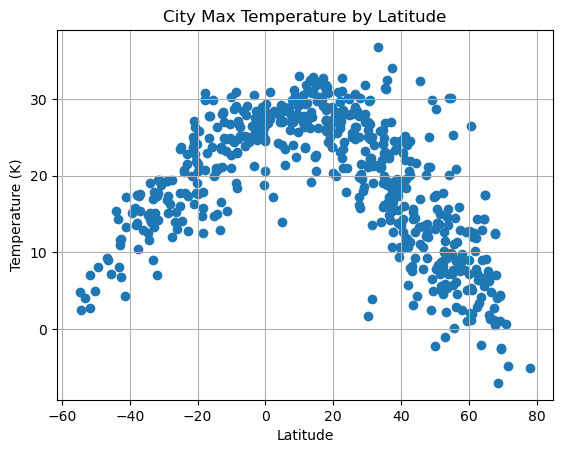

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Max Temperature by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (K)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

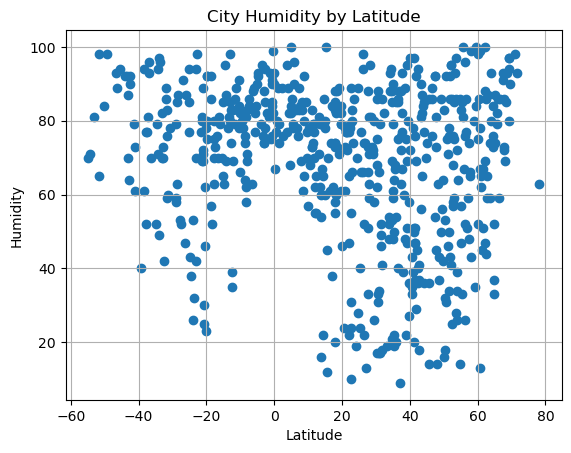

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Humidity by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

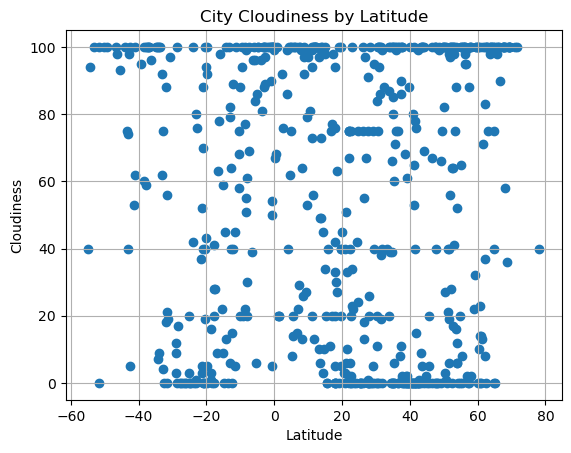

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Cloudiness by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

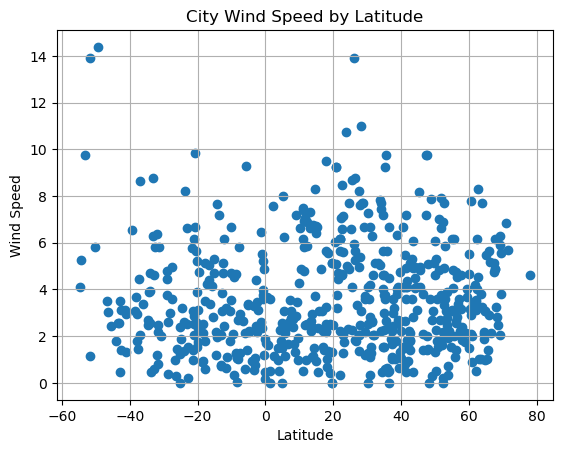

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])


# Incorporate the other graph properties
plt.title("City Wind Speed by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plots(x,y,annocoords):
    r=st.pearsonr(x,y)
    print(f"r value = {r}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    equation = f"y = {slope}*x + {intercept}"
    regression = x * slope + intercept
    plt.plot(x, regression, "r-")
    plt.annotate(equation, annocoords)
    plt.scatter(x,y)

In [20]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,7.97,41,1,1.79,US,1684373401
1,xinji,37.9028,115.2036,24.53,39,0,3.19,CN,1684373841
2,playa del ingles,27.7567,-15.5787,19.86,73,1,4.96,ES,1684373673
3,waitangi,-43.9535,-176.5597,15.46,92,100,1.79,NZ,1684373544
4,port-aux-francais,-49.3500,70.2167,8.07,98,100,14.38,TF,1684373842
...,...,...,...,...,...,...,...,...,...
583,griffith,41.5284,-87.4237,11.81,76,0,4.12,US,1684373946
584,vernon,50.2581,-119.2691,28.75,32,27,0.51,CA,1684373947
585,bogorodskoye,56.5500,37.8833,11.40,86,99,2.81,RU,1684373947


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,7.97,41,1,1.79,US,1684373401
1,xinji,37.9028,115.2036,24.53,39,0,3.19,CN,1684373841
2,playa del ingles,27.7567,-15.5787,19.86,73,1,4.96,ES,1684373673
5,nagqu,31.5000,92.0000,3.96,52,100,2.61,CN,1684373842
8,talnakh,69.4865,88.3972,-2.66,90,100,3.80,RU,1684373563


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,15.46,92,100,1.79,NZ,1684373544
4,port-aux-francais,-49.3500,70.2167,8.07,98,100,14.38,TF,1684373842
6,grytviken,-54.2811,-36.5092,2.44,71,94,5.25,GS,1684373842
7,west island,-12.1568,96.8225,26.99,69,40,6.17,CC,1684373553
9,adamstown,-25.0660,-130.1015,23.44,77,0,2.40,PN,1684373843


###  Temperature vs. Latitude Linear Regression Plot

r value = PearsonRResult(statistic=-0.7995748984477276, pvalue=7.97718189156951e-93)


Text(0, 0.5, 'Temperature')

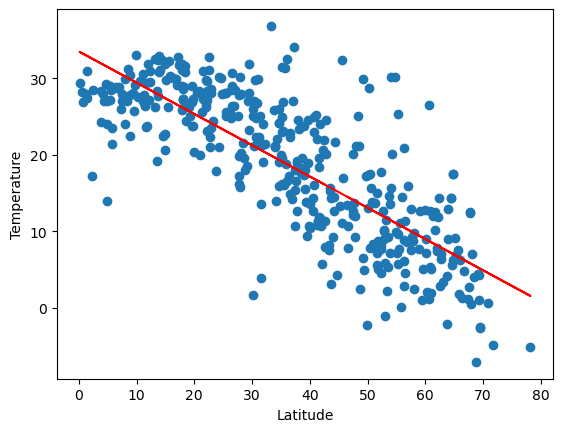

In [23]:
# Linear regression on Northern Hemisphere
plots(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (10,280))
plt.xlabel("Latitude")
plt.ylabel("Temperature")

r value = PearsonRResult(statistic=0.8204902798839819, pvalue=4.053398371379389e-44)


Text(0, 0.5, 'Temperature')

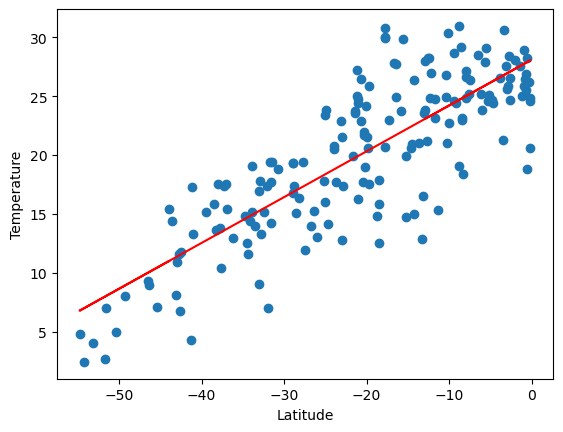

In [24]:
# Linear regression on Southern Hemisphere
plots(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-50,280))
plt.xlabel("Latitude")
plt.ylabel("Temperature")

**Discussion about the linear relationship:** These linear relationships show that as the latitude decreases for the northern hemisphere the temperature increases and that as latitude increases for the southern hemisphere so do temperatures. This shows that the closer you get to the equater the higher the temperatures get. Both r values were were around 0.8 which indicates a strong linear correlation between temperature and latitude for both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

r value = PearsonRResult(statistic=-0.035630267972000564, pvalue=0.47075743586160734)


Text(0, 0.5, 'Humidity')

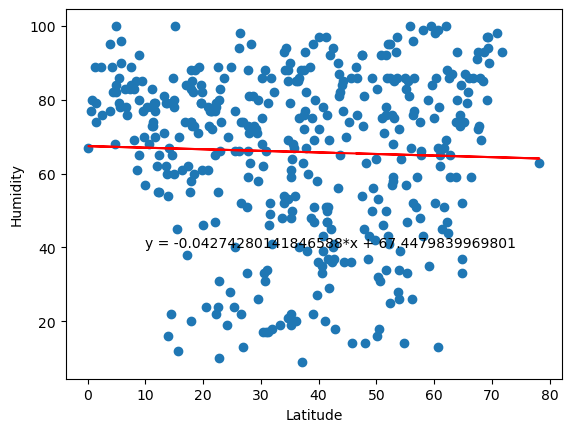

In [25]:
# Northern Hemisphere
plots(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (10,40))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

r value = PearsonRResult(statistic=0.09051383161507694, pvalue=0.23220455840685525)


Text(0, 0.5, 'Humidity')

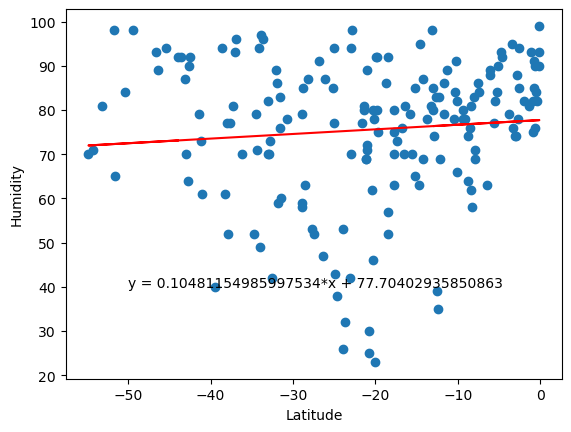

In [26]:
# Southern Hemisphere
plots(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (-50,40))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** There does not appear to be any correlation between the latitude and the humidity for either hemisphere. The r values are very close to zero for both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

r value = PearsonRResult(statistic=0.09830923973538774, pvalue=0.04612692291823933)


Text(0, 0.5, 'Cloudiness')

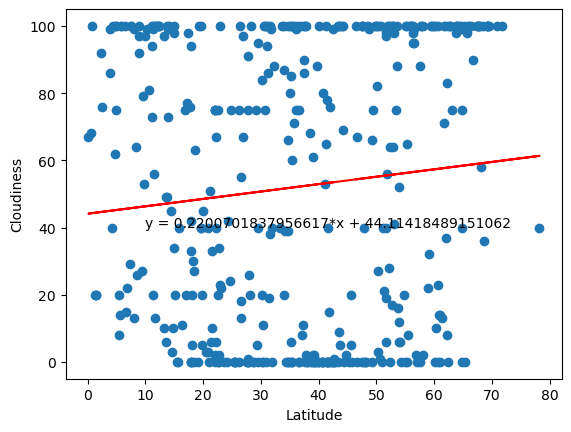

In [27]:
# Northern Hemisphere
plots(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], (10,40))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

r value = PearsonRResult(statistic=0.04677037010784793, pvalue=0.5376336906202639)


Text(0, 0.5, 'Cloudiness')

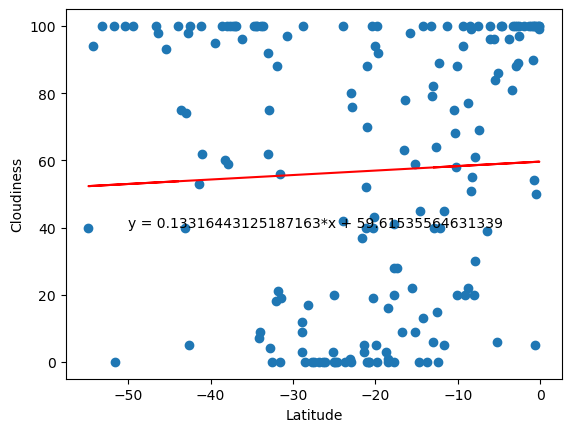

In [28]:
# Southern Hemisphere
plots(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], (-50,40))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** Same thing as for humidity. The r value for both hemispheres is close to 0 indicating that there is no linear relationship between cloudiness and latitude for either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

r value = PearsonRResult(statistic=-0.021632923107977563, pvalue=0.6615185579740595)


Text(0, 0.5, 'Wind Speed')

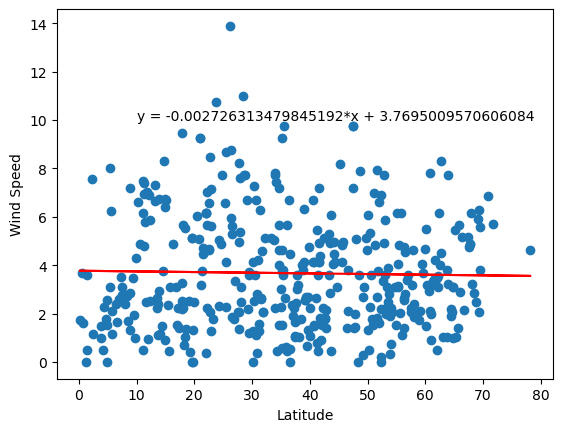

In [29]:
# Northern Hemisphere
plots(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (10,10))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

r value = PearsonRResult(statistic=-0.20945456137897644, pvalue=0.005271714966869033)


Text(0, 0.5, 'Wind Speed')

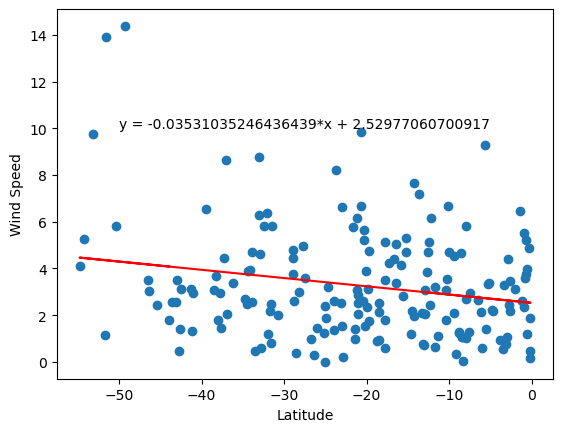

In [30]:
# Southern Hemisphere
plots(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (-50,10))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** the r values for both hemispheres are very close to 0 indicating that there is no correlation between these two variables for either hemisphere. The linear relationship is weak.